## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





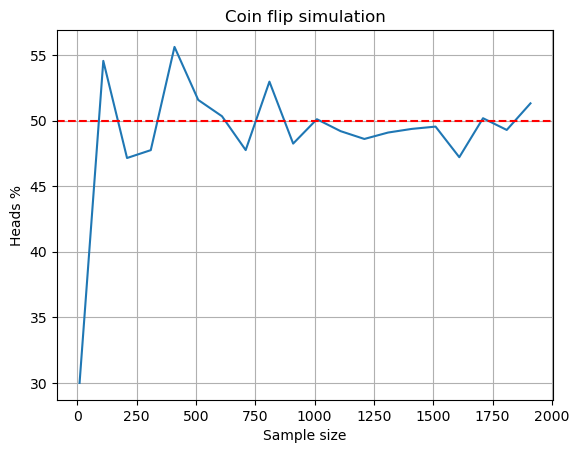

' def flip(trows,probability):\n    result = []\n    for i in range(trows):\n        result.append(random.random() < probability)\n    heads = (sum(result)/len(result))*100\n\n    return heads\n\n\n\nprobability = 0.5\ntrows = 1000\nheads = flip(trows,probability)\n# - Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.\nresults = []\nsize = []\nfor i in range(10,20001,100):\n    results.append(flip(i,probability))\n    size.append(i)\n\n# - Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)\n\nplt.plot(size, results)\nplt.axhline(y=probability*100, color=\'r\', linestyle=\'--\')\nplt.xlabel("Sample size")\nplt.ylabel("Heads %")\nplt.title("Coin flip simulation")\nplt.grid(True)\nplt.show() '

In [3]:
import matplotlib.pyplot as plt
import random


def flip(nTrows, probability):
    result = []
    for i in range(nTrows):
        result.append(random.random() < probability)
    heads = (sum(result)/len(result))*100
    
    return heads

probs = 0.5
nTrows = 1000
result = []
size = []


for i in range(10,2001,100):
    result.append(flip(i,probs))
    size.append(i)

plt.plot(size, result)
plt.axhline(y=probs*100, color='r', linestyle='--')
plt.xlabel("Sample size")
plt.ylabel("Heads %")
plt.title("Coin flip simulation")
plt.grid(True)
plt.show()

""" def flip(trows,probability):
    result = []
    for i in range(trows):
        result.append(random.random() < probability)
    heads = (sum(result)/len(result))*100

    return heads



probability = 0.5
trows = 1000
heads = flip(trows,probability)
# - Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
results = []
size = []
for i in range(10,20001,100):
    results.append(flip(i,probability))
    size.append(i)

# - Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)

plt.plot(size, results)
plt.axhline(y=probability*100, color='r', linestyle='--')
plt.xlabel("Sample size")
plt.ylabel("Heads %")
plt.title("Coin flip simulation")
plt.grid(True)
plt.show() """

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [1]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#- Quante righe e colonne ha il dataset?

print(f"Il dataset ha {df.shape[0]} righe e {df.shape[1]} colonne.")

Il dataset ha 891 righe e 12 colonne.


In [4]:
# - Controlla quanti valori mancanti ci sono per colonna
print(df.columns)

missing_values = df.isnull().sum()
print("Valori mancanti per colonna:", missing_values)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Valori mancanti per colonna: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
# - Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
embarkedMode = df['Embarked'].mode()[0]
print(f"Valore più frequente in 'Embarked': {embarkedMode[0]}")
df['Embarked'].fillna(embarkedMode, inplace=True)
nullEMbarked = df['Embarked'].isnull().sum()  # Verifica che non ci siano più valori mancanti
print(f"Valori mancanti in 'Embarked' dopo la sostituzione: {nullEMbarked}")

Valore più frequente in 'Embarked': S
Valori mancanti in 'Embarked' dopo la sostituzione: 0


In [ ]:
# - Rimuovi le righe dove il valore di 'Age' è mancante
df.dropna(subset=['Age'], inplace=True)
print(f"Valori mancanti in 'Age' : {df['Age'].isnull().sum()}")


Valori mancanti in 'Age' : 0
Valori mancanti in 'Age' : 0


In [28]:
# - Controlla se ci sono righe duplicate
duplicates = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicates}")

Numero di righe duplicate: 0


In [33]:
# - Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
mean_age_per_class = df.groupby('Pclass')['Age'].mean()
print("Età media per classe:\n", mean_age_per_class)
df['Age'].fillna(mean_age_per_class, inplace=True)
print("Valori mancanti in 'Age' dopo il riempimento con la media:", df['Age'].isnull().sum())

Età media per classe:
 Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Valori mancanti in 'Age' dopo il riempimento con la media: 0


C:\Users\acer\AppData\Local\Temp\ipykernel_6948\1054177920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age_per_class, inplace=True)


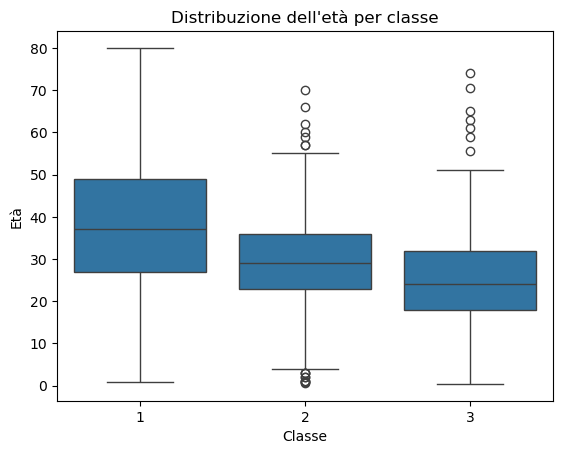

" sns.boxplot(x='Pclass', y='Age', data=df)\nplt.xlabel('Classe')\nplt.ylabel('Età')\nplt.title('Distribuzione dell'età per classe')\nplt.show() "

In [37]:
# - Visualizza la distribuzione dell'età per classe
sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Classe')
plt.ylabel('Età')
plt.title('Distribuzione dell\'età per classe')
plt.show()
""" sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Classe')
plt.ylabel('Età')
plt.title('Distribuzione dell\'età per classe')
plt.show() """

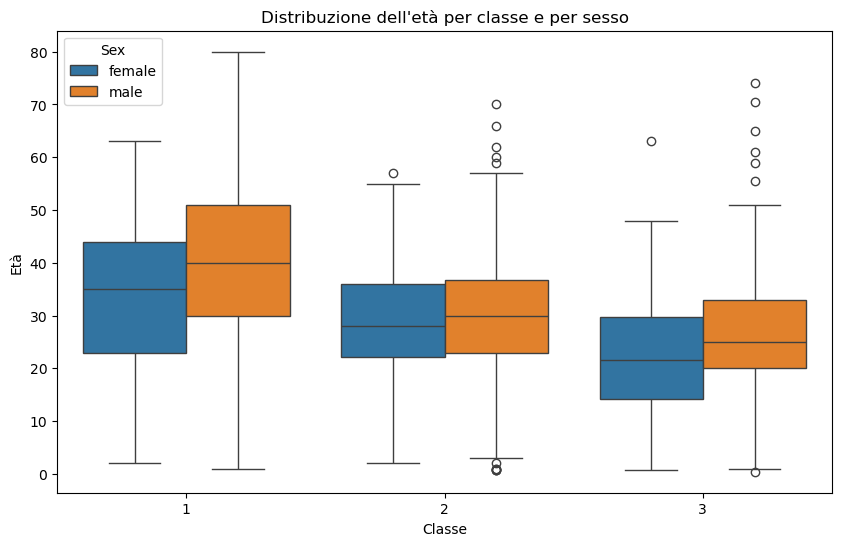

In [46]:
# - Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.xlabel('Classe')
plt.ylabel('Età')
plt.title('Distribuzione dell\'età per classe e per sesso')
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# - Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
species_count = df['species'].value_counts()
print("Distribuzione delle specie:\n", species_count)

Distribuzione delle specie:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [44]:
# - Calcola la lunghezza e la larghezza media dei petali per specie

for species in df['species'].unique():
    meanLenght = df[df['species'] == species]['petal_length'].mean()
    meanWidth = df[df['species'] == species]['petal_width'].mean()
    print(f"Specie: {species}, Lunghezza media: {meanLenght}, Larghezza media: {meanWidth}")


""" for species in df['species'].unique():
    lunghezza_media = df[df['species'] == species]['petal_length'].mean()
    larghezza_media = df[df['species'] == species]['petal_width'].mean()
    print(f"Specie: {species}, Lunghezza media: {lunghezza_media}, Larghezza media: {larghezza_media}") """

Specie: setosa, Lunghezza media: 1.4620000000000002, Larghezza media: 0.24599999999999997
Specie: versicolor, Lunghezza media: 4.26, Larghezza media: 1.3259999999999998
Specie: virginica, Lunghezza media: 5.5520000000000005, Larghezza media: 2.0260000000000002


' for species in df[\'species\'].unique():\n    lunghezza_media = df[df[\'species\'] == species][\'petal_length\'].mean()\n    larghezza_media = df[df[\'species\'] == species][\'petal_width\'].mean()\n    print(f"Specie: {species}, Lunghezza media: {lunghezza_media}, Larghezza media: {larghezza_media}") '

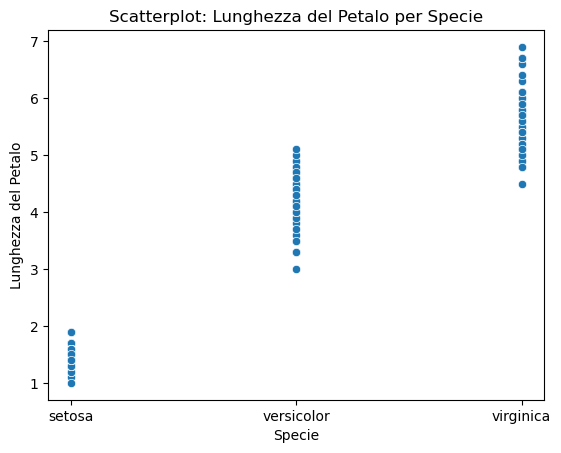

In [45]:
# - Visualizza le dimensioni dei petali per specie (scatterplot)
sns.scatterplot(data=df, x='species', y='petal_length')
plt.xlabel('Specie')
plt.ylabel('Lunghezza del Petalo')
plt.title('Scatterplot: Lunghezza del Petalo per Specie')
plt.show()


In [6]:
# - Crea una nuova colonna per l'area del petalo e analizzala
df['petal_area'] = df['petal_length'] * df['petal_width']
print(df[['species', 'petal_area']].head())

  species  petal_area
0  setosa        0.28
1  setosa        0.28
2  setosa        0.26
3  setosa        0.30
4  setosa        0.28


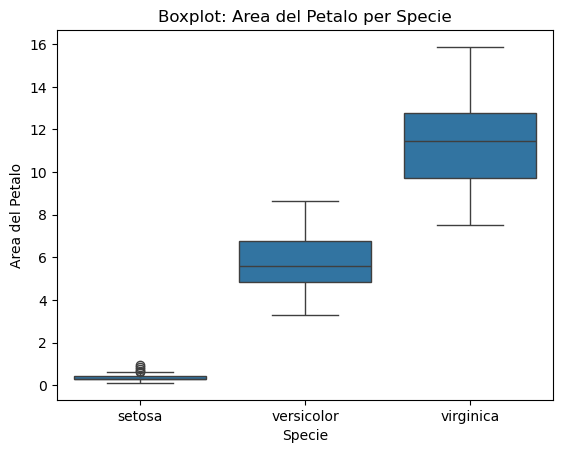

In [7]:
# - Grafico della distribuzione dell'area del petalo per specie (boxplot)
sns.boxplot(data=df, x='species', y='petal_area')
plt.xlabel('Specie')
plt.ylabel('Area del Petalo')
plt.title('Boxplot: Area del Petalo per Specie')
plt.show()